In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/displacement_data.csv')
dfx= data[["x","y","u_x"]]
dfy= data[["x","y","u_y"]]



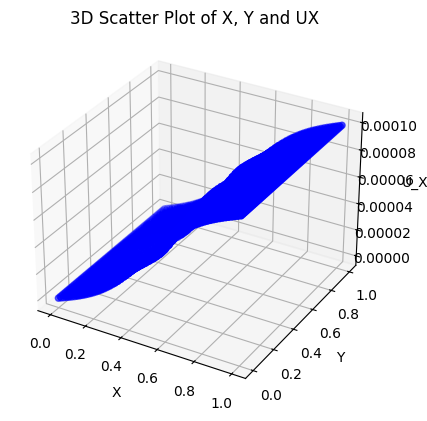

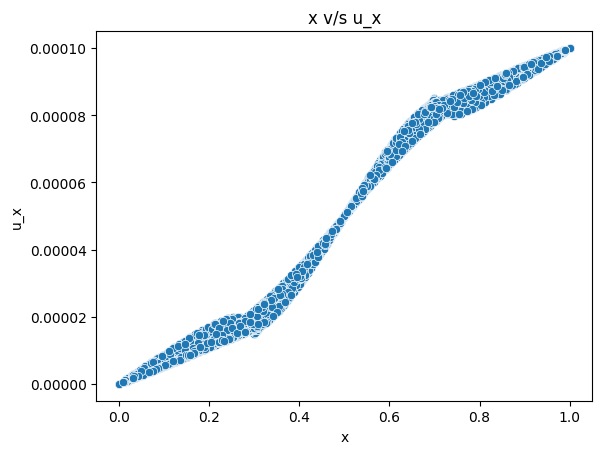

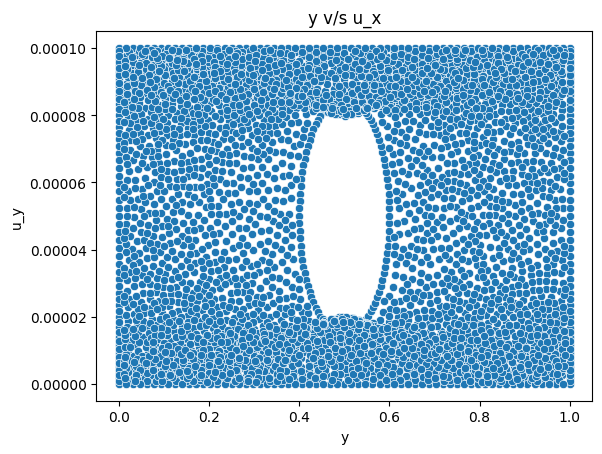

In [83]:
x1 = dfx[['x', 'y']]
y1 = dfx['u_x']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfx['x'], dfx['y'], dfx['u_x'], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_X')
plt.title("3D Scatter Plot of X, Y and UX")
plt.show()

sns.scatterplot(x="x",y="u_x",data=dfx)
plt.title("x v/s u_x")
plt.xlabel("x")
plt.ylabel("u_x")
plt.show()

sns.scatterplot(x="y",y="u_x",data=dfx)
plt.title("y v/s u_x")
plt.xlabel("y")
plt.ylabel("u_y")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


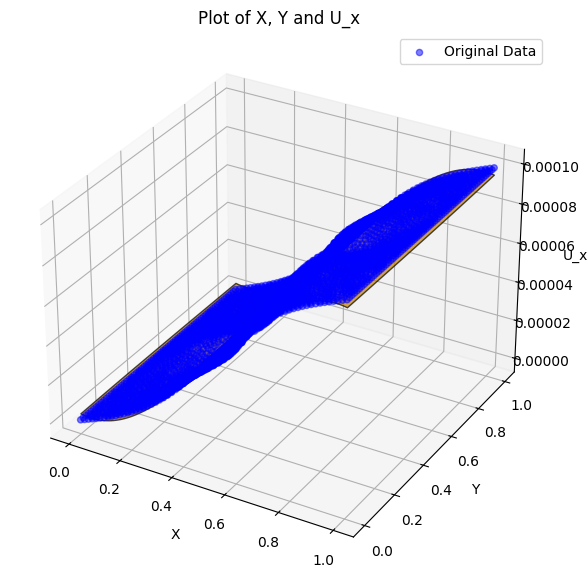

Mean Squared Error: 6.993190360255401e-12


In [84]:
degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x1)
model_x = LinearRegression()
model_x.fit(X_poly,y1)
x_range = np.linspace(dfx['x'].min(), dfx['x'].max(), 100)
y_range = np.linspace(dfx['y'].min(), dfx['y'].max(), 100)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
X_grid_poly = poly.transform(np.c_[X_grid.ravel(), Y_grid.ravel()])
Z_grid = model_x.predict(X_grid_poly).reshape(X_grid.shape)

# Plot the original data and the polynomial plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the original scatter data
ax.scatter(dfx['x'], dfx['y'], dfx['u_x'], color='blue', alpha=0.5, label="Original Data")

# Plot the polynomial plane
ax.plot_surface(X_grid, Y_grid, Z_grid, color='orange', alpha=0.7, rstride=100, cstride=100, edgecolor='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_x')
ax.set_title('Plot of X, Y and U_x')

plt.legend()
plt.show()
u_x_pred = model_x.predict(X_poly)
print("Mean Squared Error:", mean_squared_error(y1, u_x_pred))

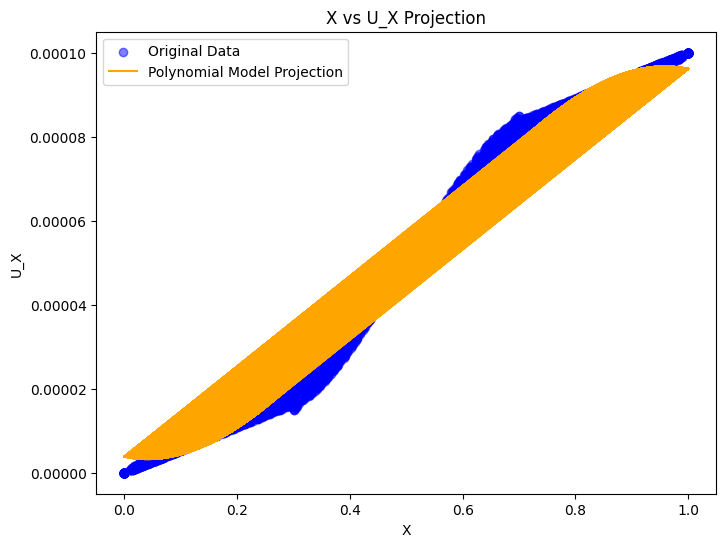

In [85]:
# Define a fixed value for y (e.g., the mean of y)
y_fixed = np.full_like(dfx['x'], dfx['y'].mean())

# Create a DataFrame with varying x and fixed y
X_x_projection = pd.DataFrame({'x': dfx['x'], 'y': y_fixed})
X_x_projection_poly = poly.transform(X_x_projection)  # Transform for polynomial terms

# Predict u_y along x-axis using the fixed y value
u_y_x_projection = model_x.predict(X_x_projection_poly)

# Plot the original data projection along the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(dfx['x'], dfx['u_x'], color='blue', alpha=0.5, label='Original Data')
plt.plot(dfx['x'], u_y_x_projection, color='orange', label='Polynomial Model Projection')
plt.xlabel('X')
plt.ylabel('U_X')
plt.title('X vs U_X Projection')
plt.legend()
plt.show()

In [86]:
# Extract terms and construct the polynomial equation string
coefficients_x = model_x.coef_
print(coefficients_x)
intercept_x = model_x.intercept_
print(intercept_x)
terms = poly.get_feature_names_out(['x', 'y'])
equation = f"{intercept_x} "  # Start with the intercept

for coef, term in zip(coefficients_x[1:], terms[1:]):  # Skip the first term as it corresponds to the intercept
    equation += f"+ ({coef}) * {term} "

print("Polynomial Regression Equation for u_x:")
print(equation)

[ 0.00000000e+00 -2.73953686e-05  1.81036984e-06  3.62118174e-04
 -3.53413187e-06 -2.12225116e-06 -2.41645510e-04  6.48689249e-07
  2.79027693e-06  5.70086975e-07]
3.3842163744352217e-06
Polynomial Regression Equation for u_x:
3.3842163744352217e-06 + (-2.7395368620996298e-05) * x + (1.8103698428212138e-06) * y + (0.00036211817356982597) * x^2 + (-3.5341318670857374e-06) * x y + (-2.122251161921985e-06) * y^2 + (-0.00024164550975796557) * x^3 + (6.486892490783716e-07) * x^2 y + (2.7902769335851205e-06) * x y^2 + (5.700869745330093e-07) * y^3 


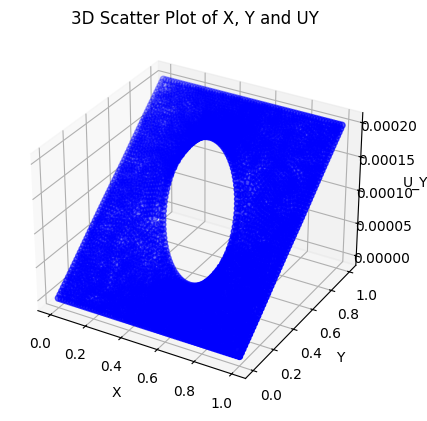

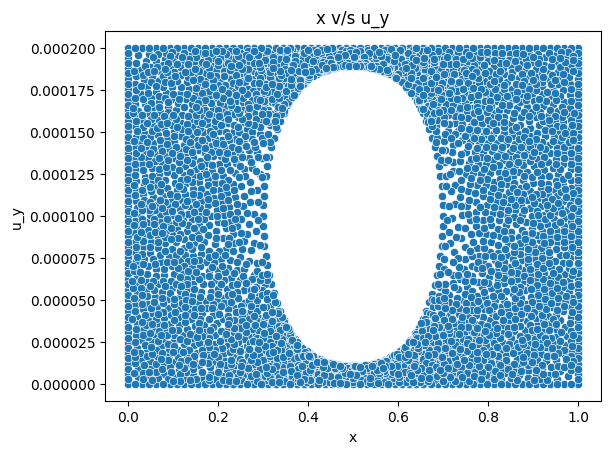

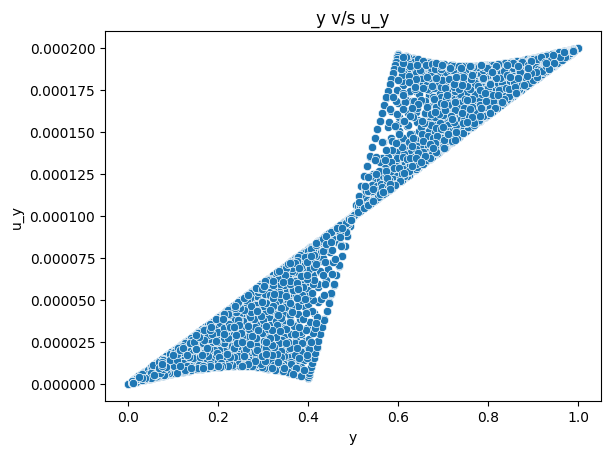

In [87]:
x2 = dfy[['x', 'y']]
y2 = dfy['u_y']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfy['x'], dfy['y'], dfy['u_y'], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_Y')
plt.title("3D Scatter Plot of X, Y and UY")
plt.show()

sns.scatterplot(x="x",y="u_y",data=dfy)
plt.title("x v/s u_y")
plt.xlabel("x")
plt.ylabel("u_y")
plt.show()

sns.scatterplot(x="y",y="u_y",data=dfy)
plt.title("y v/s u_y")
plt.xlabel("y")
plt.ylabel("u_y")
plt.show()

In [88]:
degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x2)

# Fit a linear regression model on the transformed features
model_y = LinearRegression()
model_y.fit(X_poly, y2)

# Predict u_y values for original X
u_y_pred = model_y.predict(X_poly)

# Print model coefficients
print("Polynomial Coefficients:", model_y.coef_)
print("Intercept:", model_y.intercept_)
print("Mean Squared Error:", mean_squared_error(y2, u_y_pred))
coefficients_y = model_y.coef_
intercept_y = model_y.intercept_
terms = poly.get_feature_names_out(['x', 'y'])
equation = f"{intercept_y} "  # Start with the intercept

for coef, term in zip(coefficients_y[1:], terms[1:]):  # Skip the first term as it corresponds to the intercept
    equation += f"+ ({coef}) * {term} "

print("Polynomial Regression Equation for u_y:")
print(equation)

Polynomial Coefficients: [ 0.00000000e+00 -1.48145381e-04 -1.08964234e-04  1.47843359e-04
  2.98824025e-04  7.28845720e-04  1.23274738e-06 -3.01275531e-04
  2.51896331e-06 -4.86568295e-04]
Intercept: 3.280805537699005e-05
Mean Squared Error: 2.1240933452218685e-10
Polynomial Regression Equation for u_y:
3.280805537699005e-05 + (-0.00014814538070177644) * x + (-0.00010896423401750264) * y + (0.00014784335883331716) * x^2 + (0.0002988240250291935) * x y + (0.0007288457204171139) * y^2 + (1.2327473831497577e-06) * x^3 + (-0.0003012755310160703) * x^2 y + (2.518963308764217e-06) * x y^2 + (-0.00048656829515410195) * y^3 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


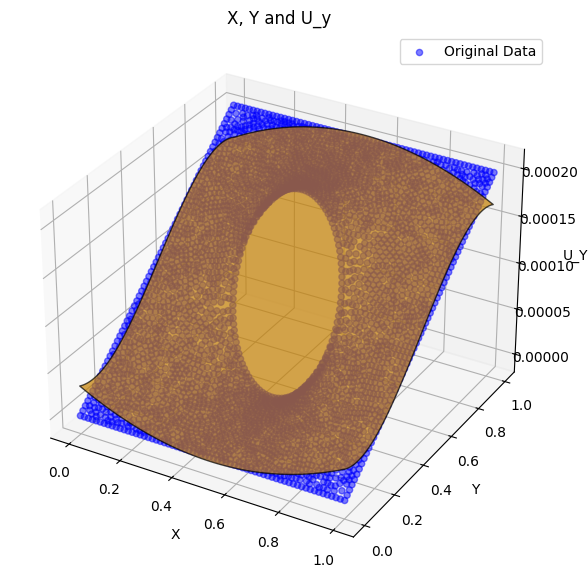

In [89]:
x_range = np.linspace(dfy['x'].min(), dfy['x'].max(), 100)
y_range = np.linspace(dfy['y'].min(), dfy['y'].max(), 100)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
X_grid_poly = poly.transform(np.c_[X_grid.ravel(), Y_grid.ravel()])
Z_grid = model_y.predict(X_grid_poly).reshape(X_grid.shape)

# Plot the original data and the polynomial plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the original scatter data
ax.scatter(dfy['x'], dfy['y'], dfy['u_y'], color='blue', alpha=0.5, label="Original Data")

# Plot the polynomial plane
ax.plot_surface(X_grid, Y_grid, Z_grid, color='orange', alpha=0.7, rstride=100, cstride=100, edgecolor='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_Y')
ax.set_title('X, Y and U_y')


plt.legend()
plt.show()

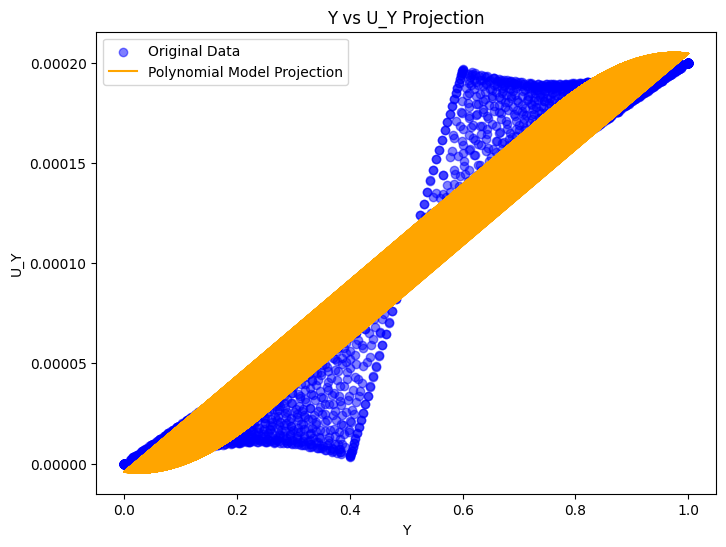

In [90]:
x_fixed = np.full_like(dfy['y'], dfy['x'].mean())

# Create a DataFrame with fixed x and varying y
X_y_projection = pd.DataFrame({'x': x_fixed, 'y': dfy['y']})
X_y_projection_poly = poly.transform(X_y_projection)  # Transform for polynomial terms

# Predict u_y along y-axis using the fixed x value
u_y_y_projection = model_y.predict(X_y_projection_poly)

# Plot the original data projection along the y-axis
plt.figure(figsize=(8, 6))
plt.scatter(dfy['y'], dfy['u_y'], color='blue', alpha=0.5, label='Original Data')
plt.plot(dfy['y'], u_y_y_projection, color='orange', label='Polynomial Model Projection')
plt.xlabel('Y')
plt.ylabel('U_Y')
plt.title('Y vs U_Y Projection')
plt.legend()
plt.show()

In [91]:
from sympy import symbols, diff
x,y = symbols('x y')
ux=(
    intercept_x+
    coefficients_x[1]*x+
    coefficients_x[2]*y+
    coefficients_x[3]*x**2+
    coefficients_x[4]*x*y+
    coefficients_x[5]*y**2+
    coefficients_x[6]*x**3+
    coefficients_x[7]*x**2*y+
    coefficients_x[8]*x*y**2+
    coefficients_x[9]*y**3
)
print(ux)

-0.000241645509757966*x**3 + 6.48689249078372e-7*x**2*y + 0.000362118173569826*x**2 + 2.79027693358512e-6*x*y**2 - 3.53413186708574e-6*x*y - 2.73953686209963e-5*x + 5.70086974533009e-7*y**3 - 2.12225116192198e-6*y**2 + 1.81036984282121e-6*y + 3.38421637443522e-6


In [92]:
uy=(
    intercept_y+
    coefficients_y[1]*x+
    coefficients_y[2]*y+
    coefficients_y[3]*x**2+
    coefficients_y[4]*x*y+
    coefficients_y[5]*y**2+
    coefficients_y[6]*x**3+
    coefficients_y[7]*x**2*y+
    coefficients_y[8]*x*y**2+
    coefficients_y[9]*y**3
)
print(uy)

1.23274738314976e-6*x**3 - 0.00030127553101607*x**2*y + 0.000147843358833317*x**2 + 2.51896330876422e-6*x*y**2 + 0.000298824025029194*x*y - 0.000148145380701776*x - 0.000486568295154102*y**3 + 0.000728845720417114*y**2 - 0.000108964234017503*y + 3.28080553769901e-5


In [93]:
exx_1=diff(ux,x)
eyy_1=diff(uy,y)
exx = sum(term for term in exx_1.as_ordered_terms() if term.has(x, y))
eyy = sum(term for term in eyy_1.as_ordered_terms() if term.has(x, y))
print(exx)
print(eyy)

-0.000724936529273897*x**2 + 1.29737849815674e-6*x*y + 0.000724236347139652*x + 2.79027693358512e-6*y**2 - 3.53413186708574e-6*y
-0.00030127553101607*x**2 + 5.03792661752843e-6*x*y + 0.000298824025029194*x - 0.00145970488546231*y**2 + 0.00145769144083423*y


In [94]:
s_xx_lambda= sum([exx,eyy])
s_yy_lambda= s_xx_lambda
s_xx_mew= 2*exx
s_yy_mew= 2*eyy

print(s_xx_lambda)
print(s_yy_lambda)
print(s_xx_mew)
print(s_yy_mew)

-0.00102621206028997*x**2 + 6.33530511568518e-6*x*y + 0.00102306037216885*x - 0.00145691460852872*y**2 + 0.00145415730896714*y
-0.00102621206028997*x**2 + 6.33530511568518e-6*x*y + 0.00102306037216885*x - 0.00145691460852872*y**2 + 0.00145415730896714*y
-0.00144987305854779*x**2 + 2.59475699631349e-6*x*y + 0.0014484726942793*x + 5.58055386717024e-6*y**2 - 7.06826373417147e-6*y
-0.000602551062032141*x**2 + 1.00758532350569e-5*x*y + 0.000597648050058387*x - 0.00291940977092461*y**2 + 0.00291538288166846*y


In [95]:
R_x_1=s_xx_lambda.subs(x,1)
R_x_2=s_xx_mew.subs(x,1)
print(R_x_1,R_x_2)

-0.00145691460852872*y**2 + 0.00146049261408283*y - 3.15168812112156e-6 5.58055386717024e-6*y**2 - 4.47350673785799e-6*y - 1.40036426848943e-6


In [96]:
from sympy import integrate
R_x_lambda=integrate(R_x_1, (y, 0, 1))
R_x_mew=integrate(R_x_2, (y, 0, 1))
print(R_x_lambda)
print(R_x_mew)

0.000241456416077385
-1.77693301502834e-6


In [97]:
R_y_1=s_yy_lambda.subs(y,1)
R_y_2=s_yy_mew.subs(y,1)
R_y_lambda=integrate(R_y_1, (x, 0, 1))
R_y_mew=integrate(R_y_2, (x, 0, 1))
print(R_y_lambda)
print(R_y_mew)


0.000169869852317364
9.89847083798520e-5


In [98]:
Reaction = pd.read_csv('/content/reaction_data.csv')
Reaction.head()

,Reaction,Value
0,R3,-4.263891e+07
1,R4,4.263891e+07
2,R1,-5.075432e+07
3,R2,5.075432e+07


In [99]:
R_x=Reaction.iloc[1,1]
R_y=Reaction.iloc[3,1]
C=np.array([R_x,R_y],dtype = float)
print(C)

[42638914.91497561 50754320.35510449]


In [100]:
A=np.array([[R_x_lambda,R_x_mew],[R_y_lambda,R_y_mew]],dtype = float)
print(A)

[[ 2.41456416e-04 -1.77693302e-06]
 [ 1.69869852e-04  9.89847084e-05]]


In [101]:
l= np.linalg.solve(A, C)
print(f"Lame's constants are:- {l}")

Lame's constants are:- [1.78114494e+11 2.07082871e+11]


In [102]:
s_xx= l[0]*s_xx_lambda+(l[1]*s_xx_mew)
s_yy= l[0]*s_yy_lambda+(l[1]*s_yy_mew)
from sympy import lambdify
s_x= lambdify((x,y),s_xx)
s_y = lambdify((x,y),s_yy)
e_x= lambdify((x,y),exx)
e_y = lambdify((x,y),eyy)
data['stress_x'] = np.vectorize(s_x)(data['x'], data['y'])
data['stress_y'] = np.vectorize(s_y)(data['x'], data['y'])
data['e_x'] = np.vectorize(e_x)(data['x'], data['y'])
data['e_y'] = np.vectorize(e_y)(data['x'], data['y'])

data.head()

,x,y,u_x,u_y,stress_x,stress_y,e_x,e_y
0,0.000000,1.000000,0.000000,0.000200,-7.991942e+05,-1.325015e+06,-7.438549e-07,-2.013445e-06
1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1.000000,0.000000,0.000100,0.000000,-8.513528e+05,-1.576691e+06,-7.001821e-07,-2.451506e-06
3,1.000000,1.000000,0.000100,0.000200,1.519236e+04,3.132403e+05,-1.466586e-07,5.729760e-07
4,0.699605,0.506279,0.000084,0.000106,1.656769e+08,2.799815e+08,1.512466e-04,4.272340e-04


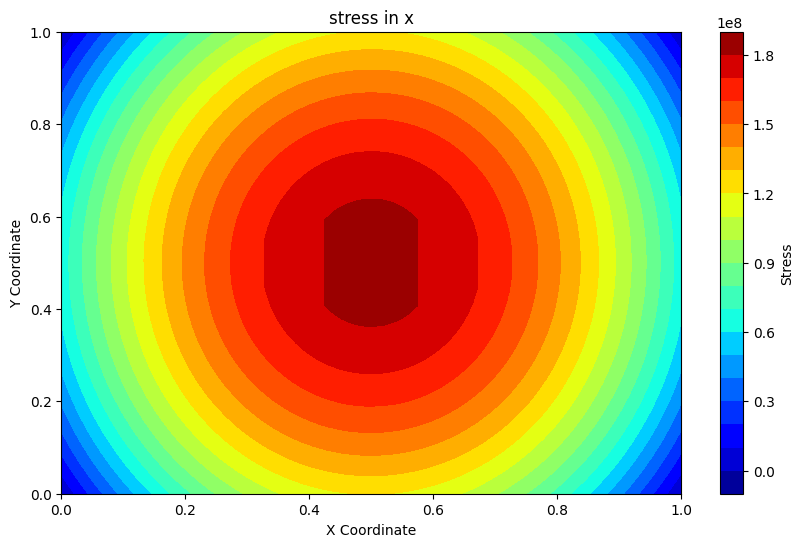

In [103]:
plt.figure(figsize=(10, 6))
contour = plt.tricontourf(data['x'], data['y'], data['stress_x'], levels=20, cmap="jet")

# Step 2: Add a color bar for reference
cbar = plt.colorbar(contour)
cbar.set_label("Stress")

# Optional: Add labels, title, etc.
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("stress in x")

plt.show()

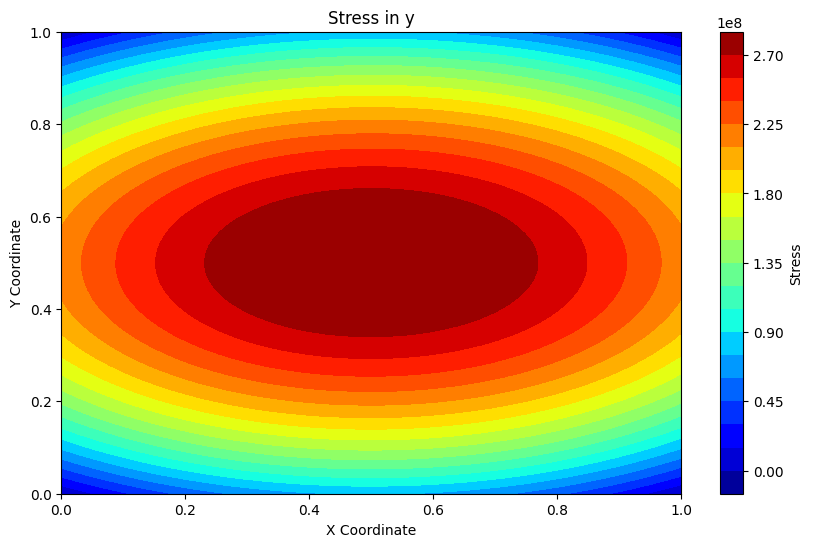

In [104]:
plt.figure(figsize=(10, 6))
contour = plt.tricontourf(data['x'], data['y'], data['stress_y'], levels=20, cmap="jet")

# Step 2: Add a color bar for reference
cbar = plt.colorbar(contour)
cbar.set_label("Stress")

# Optional: Add labels, title, etc.
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Stress in y")

plt.show()

In [105]:
Txy=(l[1])*(diff(ux,y)+diff(uy,x))
T_xy=lambdify((x,y),Txy)
data['Txy'] = np.vectorize(T_xy)(data['x'], data['y'])
data.head()

,x,y,u_x,u_y,stress_x,stress_y,e_x,e_y,Txy
0,0.000000,1.000000,0.000000,0.000200,-7.991942e+05,-1.325015e+06,-7.438549e-07,-2.013445e-06,3.157470e+07
1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.030347e+07
2,1.000000,0.000000,0.000100,0.000000,-8.513528e+05,-1.576691e+06,-7.001821e-07,-2.451506e-06,3.109650e+07
3,1.000000,1.000000,0.000100,0.000200,1.519236e+04,3.132403e+05,-1.466586e-07,5.729760e-07,-3.064770e+07
4,0.699605,0.506279,0.000084,0.000106,1.656769e+08,2.799815e+08,1.512466e-04,4.272340e-04,-2.146872e+05


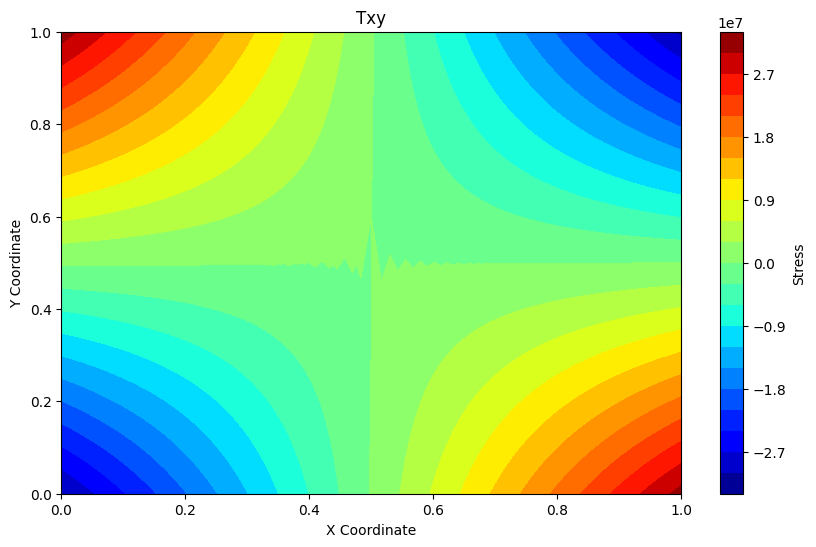

In [106]:
plt.figure(figsize=(10, 6))
contour = plt.tricontourf(data['x'], data['y'], data['Txy'], levels=20, cmap="jet")

# Step 2: Add a color bar for reference
cbar = plt.colorbar(contour)
cbar.set_label("Stress")

# Optional: Add labels, title, etc.
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Txy")

plt.show()